# Latihan 1 | Decision Tree for Regression

## Latihan 1.1 | Basic Implementation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure', \
                  'bl_0','bl_1', 'bl_2', 'bl_3', 'bl_4', 'bl_5']

<AxesSubplot:>

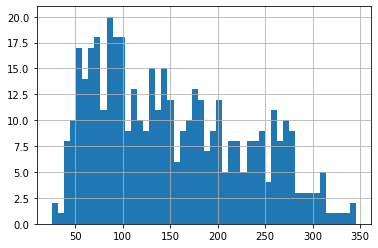

In [2]:
pd.Series(y).hist(bins=50)

In [3]:
bins = 50*np.arange(8)
bins

array([  0,  50, 100, 150, 200, 250, 300, 350])

In [4]:
binned_y = np.digitize(y, bins)

<AxesSubplot:>

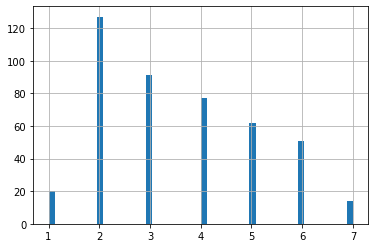

In [5]:
pd.Series(binned_y).hist(bins=50)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=binned_y)

In [7]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
y_pred = dtr.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

64.4494382022472

In [10]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.605350785732593

## Latihan 1.2 | Visualization

<AxesSubplot:>

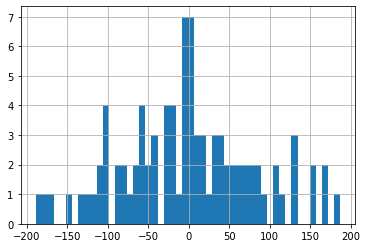

In [11]:
pd.Series((y_test - y_pred)).hist(bins=50)

<AxesSubplot:>

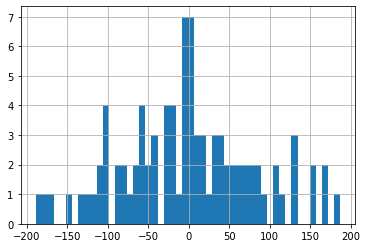

In [12]:
pd.Series((y_test - y_pred)).hist(bins=50)

In [14]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_diabetes = StringIO()
tree.export_graphviz(dtr, out_file = dot_diabetes, feature_names = X_feature_names)
(graph,) = pydot.graph_from_dot_data(dot_diabetes.getvalue())

Image(graph.create_png())

## Latihan 1.3 | Reduce Overfitting

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure',\
                  'bl_0', 'bl_1', 'bl_2', 'bl_3', 'bl_4', 'bl_5']

bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=binned_y)

In [16]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

gs_inst = GridSearchCV(dtr, param_grid = {'max_depth': [3,5,7,9,20]},
                       iid=False,
                       cv=10)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [17]:
gs_inst.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3,
                     max_features=None,
                     max_leaf_nodes=None, min_impurity_split=1e-07,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, presort=False,
                     random_state=None,
                     splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
y_pred = gs_inst.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

55.314271835873726

In [19]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.5118183195829699

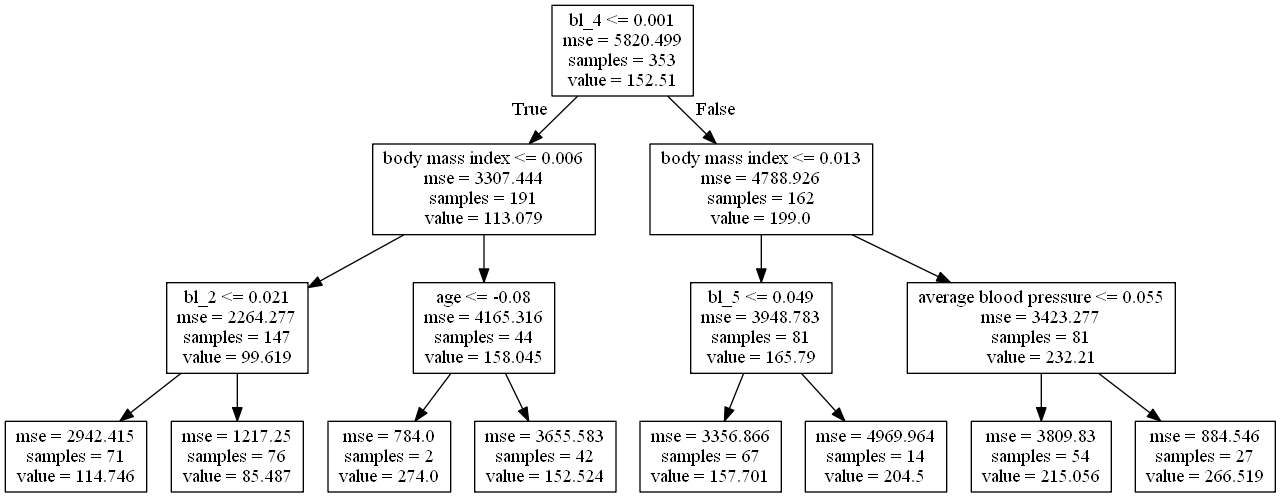

In [20]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_diabetes = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_diabetes,
feature_names = X_feature_names)
(graph,) = pydot.graph_from_dot_data(dot_diabetes.getvalue())

Image(graph.create_png())

# Latihan 2 | Gradient Boosting

In [46]:
from __future__ import division #Load within Python 2.7 for regular division

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

#bin output variable to split training and testing into two similar sets
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=binned_y)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [48]:
param_dist = {'max_features' : ['log2',1.0],
             'max_depth' : [3, 5, 7, 10],
             'min_samples_leaf' : [2, 3, 5, 10],
             'n_estimators': [50, 100],
             'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
             'loss' : ['ls', 'huber']
             }

In [50]:
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
                                param_distributions = param_dist,
                                cv=3,
                                n_iter = 30, n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'max_features': ['log2', 1.0], 'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [2, 3, 5, 10], 'n_estimators': [50, 100], 'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3], 'loss': ['ls', 'huber']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [51]:
import numpy as np
import pandas as np

def get_grid_df(fitted_gs_estimator):
    res_dict = fitted_gs_estimator.cv_results_
    
    results_df = pd.DataFrame()
    for key in res_dict.keys():
        results_df[key] = res_dict[key]
        
        return results_df
    
def group_report(results_df):
    param_cols = [x for x in results_df.columns if 'param' in x
                 and x is not 'params']
    focus_cols = param_cols + ['mean_test_score']
    
    print("Grid CV Report \n")
    
    output_df = pd.DataFrame(columns = ['param_type', 'param_set', 'mean_score',\
                                       'mean_std'])
    cc = 0
    
    for param in param_cols:
        for key,group in results_df.groupby(param):
            output_df.loc[cc] = (param, key,
                                group['mean_test_score'].mean(),
                                group['mean_test_score'].std())
            cc += 1
    return output_df

In [52]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std


In [53]:
param_dist = {'max_features' : ['sqrt',0.5,1.0],
             'max_depth' : [2,3,4],
             'min_samples_leaf' : [3, 4],
             'n_estimators' : [50, 100],
             'learning_rate' : [0.2,0.25, 0.3, 0.4],
             'loss' : ['ls','huber']
             }
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
                                param_distributions = param_dist,
                                cv=3,
                                n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'max_features': ['sqrt', 0.5, 1.0], 'max_depth': [2, 3, 4], 'min_samples_leaf': [3, 4], 'n_estimators': [50, 100], 'learning_rate': [0.2, 0.25, 0.3, 0.4], 'loss': ['ls', 'huber']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [54]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std


In [55]:
param_dist = {'max_features' : [0.4, 0.5, 0.6],
             'max_depth' : [5,6],
             'min_samples_leaf' : [4,5],
             'n_estimators' : [300],
             'learning_rate' : [0.3],
             'loss' : ['ls','huber']
             }

In [56]:
rs_gbt = GradientBoostingRegressor(warm_start=True,
                                  max_features = 0.5,
                                  min_samples_leaf = 4,
                                  learning_rate=0.3,
                                  max_depth = 6,
                                  n_estimators = 4000,loss = 'huber')
rs_gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='huber', max_depth=6,
             max_features=0.5, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=True)

In [57]:
y_pred = rs_gbt.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_test, y_pred))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.8363852412062445
MAE :  0.3062854411656221
MAPE :  0.17405334562856967


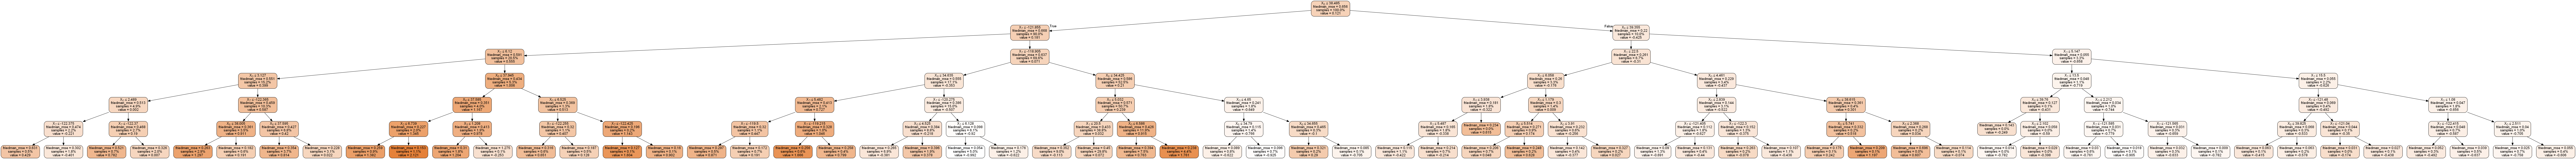

In [58]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

# Get the tree number 1
sub_tree_1 = rs_gbt.estimators_[1, 0]

dot_data = tree.export_graphviz(
    sub_tree_1,
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
(graph,) = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())